# Main Method path invariant

## Imports

In [2]:
import sys
sys.path.append("../../src")
%reload_ext autoreload
%autoreload 2
from helpers import graph
from path_invariants import *
from math import sqrt

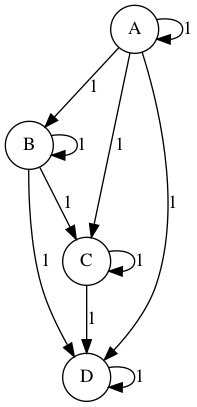

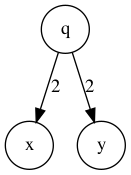

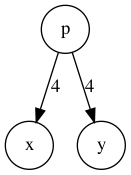

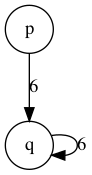

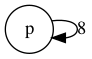

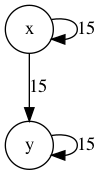

[(1, ['A', 'B', 'C', 'D']), (8, ['p']), (15, ['x', 'y'])]

In [40]:
A = "pq"
B = "xy"
C = "ABCD"

Log = [
    A, A+B, B, 
    A+B*10, 
    '...' + A + '...' + B,
    C,
    'pqxypxyq'
]

G=successor_graph("")
for T in Log:
    paths = paths_from_trace(T)
    
    # Here I sum the multi path graph
    for r, P in paths:
        for i in range(0,int(r)):
            G = add_graphs(G, successor_graph(P) )
        
# Search paths in every layer
weights = set( [G[u][v]["weight"] for u, v in G.edges() ] )

for f in weights:
    graph( f_layer(f, G) )

invariants=[]
for f in weights:
    invariants += paths_in_components( f_layer(f, G) )
    
invariants